<a href="https://colab.research.google.com/github/rivkms/2021_sw_exam/blob/main/30204%EA%B0%95%EB%AF%BC%EC%84%B1_4%EC%A3%BC%EC%B0%A8_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_%EB%B6%84%EB%A5%981(%EA%B3%BC%EC%A0%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4주차 ML1 Classification 실습 과제
- 과제를 완성하여 클래스룸에 기한내에 제출합니다.
- 머신러닝 프로세스(데이터 수집 -> 데이터 전처리 -> 모델 학습 -> 모델 예측 및 평가)대로 실습을 진행합니다.
- 모델을 완성한 후, '5.모델 분석'에서 자신의 모델을 분석한 결과를 작성합니다.


## 1.데이터 수집
- 캐글의 데이터 API를 이용하여 Red Wine Quality 데이터를 로드하세요.(https://www.kaggle.com/kosovanolexandr/decision-tree-90-62-red-wine-quality)

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle (1).json


In [ ]:
!kaggle datasets download -d uciml/red-wine-quality-cortez-et-al-2009

  0% 0.00/25.6k [00:00<?, ?B/s]
100% 25.6k/25.6k [00:00<00:00, 9.80MB/s]


In [ ]:
!unzip red-wine-quality-cortez-et-al-2009.zip
!ls

Archive:  red-wine-quality-cortez-et-al-2009.zip
  inflating: winequality-red.csv     
kaggle.json				sample_data
red-wine-quality-cortez-et-al-2009.zip	winequality-red.csv


- pandas의 데이터프레임 'data' 변수를 선언하여 csv 파일 형태의 데이터를  저장하세요.

In [ ]:
import numpy as np
import pandas as pd

# csv 파일을 pandas dataframe으로 읽기
data = pd.read_csv('winequality-red.csv')

# 상위 5개 행 출력
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2.데이터 전처리

- data.shape(), data.info(), data.describe() 등을 통하여 데이터의 형태를 확인하고 NA(None, Null, Nan) 값이 있는 열이 있는지 확인하세요.

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
data.shape

(1599, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- 결측치 등 삭제/대체가 필요한 행/열이 있다면 처리하세요.

In [ ]:
data.isna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


- 클래스별("quality" 컬럼)로 균등한 분포를 지니는지 시각화하여 확인하세요.

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

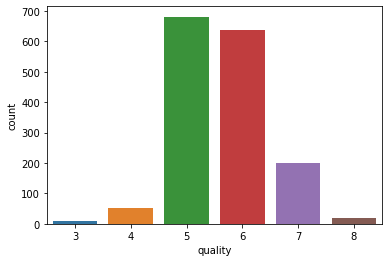

In [ ]:
import seaborn as sns
%matplotlib inline

sns.countplot(data=data, x="quality")
data.loc[:,'quality'].value_counts()

현재 위 그래프를 보았을 떄 3, 4, 8의 경우 굉장히 작은 양의 데이터가, 5, 6 에는 많은 양의 데이터가 많다는 것을 볼 수 있고 이를 통하여 데이터가 편중되어 있다는 것을 알 수 있다. 

- 머신러닝 학습을 위해 피처 데이터 세트 x, 레이블 데이터 세트 y를 추출하세요.
레드 와인 품질을 분류하는 것이 목적이므로 'quality' 컬럼을 y에 대입합니다.

In [ ]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

- train set과 test set을 적절한 비율로 나누세요.

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 156, stratify=y)

In [ ]:
x_train.head()
y_train.head()

1421    5
1190    6
159     6
769     5
1122    6
Name: quality, dtype: int64

## 3.모델 학습
- DecisionTreeClassifier 객체를 생성하고, 모델 학습을 수행하세요.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Decision Tree Classification
dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## 4.모델 예측 및 평가
- test set을 모델에 주입하여 예측 정확도를 확인하세요.

In [ ]:
# 예측값 확인
pred = dt.predict(x_test)
type(pred)
pred[:5]

array([5, 4, 6, 8, 6])

In [ ]:
from sklearn.metrics import accuracy_score

# 정확도 출력
accuracy_score(y_test, pred)

0.6125

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

print('오차 행렬\n', confusion_matrix(y_test, pred))
print('\n평가 지표\n', classification_report(y_test, pred))

오차 행렬
 [[ 0  0  2  0  0  0]
 [ 1  1  5  2  2  0]
 [ 0  6 97 30  3  0]
 [ 2  3 30 73 16  4]
 [ 1  0  5  8 25  1]
 [ 0  0  1  2  0  0]]

평가 지표
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.09      0.10        11
           5       0.69      0.71      0.70       136
           6       0.63      0.57      0.60       128
           7       0.54      0.62      0.58        40
           8       0.00      0.00      0.00         3

    accuracy                           0.61       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.62      0.61      0.62       320



## 5.모델 분석
- 모델의 문제점은? :
 - 1 . 데이터의 정확도가 0.6125%, 정확도가 낮다고 할 수 있다. 
 - 2 . 세팅을 default로 함으로서 기본 세팅으로만 모델을 형성하였다. 
- 모델의 개선 가능성은? : 여러 세팅들을 변화시키면서(예를 들어 결정트리의 여러 세팅들에 변화를 주는 등) 모델을 변화시키면서 정확도를 상승 시킬 수 있을것이라 생각이 된다. 

# 데이터 전처리

In [ ]:
# describe를 통해 데이터 특징 살펴보기
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([403., 203., 316., 205., 262., 132.,  62.,  15.,   0.,   1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

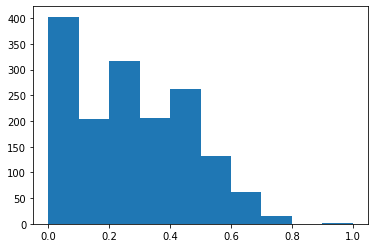

In [ ]:
# 글루코스 값의 분포를 히스토그램으로 확인하기
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(data['citric acid'], bins=10)

In [ ]:
# 0값을 검사할 피처명 리스트 객체 설정
zero_features = ['citric acid', 'chlorides','free sulfur dioxide','total sulfur dioxide']

# 전체 데이터 건수
total_count = data['citric acid'].count()


In [ ]:

# 피처별로 반복 하면서 데이터 값이 0 인 데이터 건수 추출하고, 퍼센트 계산
for feature in zero_features:
    zero_count = data[data[feature]==0][feature].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(feature, zero_count, 100*zero_count/total_count))

citric acid 0 건수는 132, 퍼센트는 8.26 %
chlorides 0 건수는 0, 퍼센트는 0.00 %
free sulfur dioxide 0 건수는 0, 퍼센트는 0.00 %
total sulfur dioxide 0 건수는 0, 퍼센트는 0.00 %


In [ ]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
data[zero_features]=data[zero_features].replace(0,data[zero_features].mean())

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.293345,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.177148,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.010000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.150000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.270976,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler
# StandardScaler 클래스를 이용해 피처 데이터 세트에 일괄적으로 스케일링 적용
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 156, stratify=y)

# 학습, 예측 및 평가 수행. 
dt2=DecisionTreeClassifier()
dt2.fit(x_train,y_train)
dt2_prediction = dt2.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
print('오차 행렬\n', confusion_matrix(y_test, dt2_prediction))
print('\n평가 지표\n', classification_report(y_test, dt2_prediction))

오차 행렬
 [[ 0  0  1  1  0  0]
 [ 1  3  4  2  1  0]
 [ 1  0 99 25  9  2]
 [ 1  6 28 71 17  5]
 [ 0  0  6  7 25  2]
 [ 0  0  1  1  0  1]]

평가 지표
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.33      0.27      0.30        11
           5       0.71      0.73      0.72       136
           6       0.66      0.55      0.60       128
           7       0.48      0.62      0.54        40
           8       0.10      0.33      0.15         3

    accuracy                           0.62       320
   macro avg       0.38      0.42      0.39       320
weighted avg       0.64      0.62      0.63       320



**데이터 전처리를 통하여 citric acid의 0의 값을 변화시켰음**

- 문제점 : 오차가 조금밖에 변화하지 않았음

- 개선방안 : 정확도가 낮은 quarlityㅢ test set을 추가하면 될것이다. 

# 하리퍼 파라미터 튜님

In [ ]:
# 트리의 최대 깊이를 6으로 제한했을 때
dt3 = DecisionTreeClassifier(max_depth=6)
dt3.fit(x_train , y_train)
dt3_prediction = dt3.predict(x_test)

print('오차 행렬\n', confusion_matrix(y_test, dt3_prediction))
print('\n평가 지표\n', classification_report(y_test, dt3_prediction))

오차 행렬
 [[  0   0   1   1   0   0]
 [  0   1   5   4   1   0]
 [  0   1 103  31   1   0]
 [  0   2  38  70  18   0]
 [  0   0   4  18  18   0]
 [  0   0   0   3   0   0]]

평가 지표
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.25      0.09      0.13        11
           5       0.68      0.76      0.72       136
           6       0.55      0.55      0.55       128
           7       0.47      0.45      0.46        40
           8       0.00      0.00      0.00         3

    accuracy                           0.60       320
   macro avg       0.33      0.31      0.31       320
weighted avg       0.58      0.60      0.59       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**하이퍼 파라미터 튜닝을 통하여 depth를 6으로 제한하였고 이 때 정확도가 0.60으로 나오는 것을 알 수 있었다.**

- 문제점 : 오차가 더 떨어졌다. 성능이 떨어졌음

- 개선방안 : max_depth의 값을 변화시키면서 확인을 한다면 정확도가 올라갈것이라고 판단됨. 

# k-fold cross validation

In [ ]:
# 난수 발생 시드 고정
np.random.seed(7)

from sklearn.model_selection import cross_val_score

dt4 = DecisionTreeClassifier(max_depth=6)

In [ ]:
# 성능 지표 정확도, 교차검증 세트 5개 
scores = cross_val_score(dt4,x_scaled,y,scoring='accuracy',cv=6)
print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores),4))

교차 검증별 정확도 :  [0.4719 0.5206 0.4532 0.5    0.4925 0.4812]
평균 검증 정확도 :  0.4866


**depth를 고정하고, 이를 교차검증을 진행하였다.** 

- 문제점 : 오차가 더 떨어졌다. 성능이 떨어졌음

- 개선방안 : 폴드 수를 변화시키면서 교차검증시키면 성능이 올라갈 수 도 있을것 같다. 실행 결과 정확도가 높아지는 경우도 있는 반면 꼭 그런 것은 아니였다. 



# randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 트리 개수 최대 50개
rf = RandomForestClassifier(n_estimators=50,max_features=5,random_state=0)
rf.fit(x_train , y_train)
rf_prediction = rf.predict(x_test)

print('오차 행렬\n', confusion_matrix(y_test, rf_prediction))
print('\n평가 지표\n', classification_report(y_test, rf_prediction))

오차 행렬
 [[  0   0   2   0   0   0]
 [  1   0   5   5   0   0]
 [  0   0 113  22   1   0]
 [  0   0  29  82  17   0]
 [  0   0   3  11  25   1]
 [  0   0   0   1   2   0]]

평가 지표
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.74      0.83      0.78       136
           6       0.68      0.64      0.66       128
           7       0.56      0.62      0.59        40
           8       0.00      0.00      0.00         3

    accuracy                           0.69       320
   macro avg       0.33      0.35      0.34       320
weighted avg       0.66      0.69      0.67       320



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# 성능 지표 정확도, 교차검증 세트 5개
scores = cross_val_score(rf,x_scaled,y,scoring='accuracy', cv=5)
print('교차 검증별 정확도 : ', np.round(scores, 4))
print('평균 검증 정확도 : ', np.round(np.mean(scores),4))

교차 검증별 정확도 :  [0.5188 0.5406 0.6    0.5688 0.5674]
평균 검증 정확도 :  0.5591


**randomforest를 이용하여 트리개수를 한정시키고, 여러 세팅을 설정하면서 트리 생성을 무작위로 실행하였다.**

다행히 성능은 오른것 같다. 

문제점 : 더욱 성능을 올릴 수 있을 것 같다. 

개선방안 : 트리 개수의 수를 변화시키면 더 좋은 결과를 얻을수 있을것이다. 